In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Portfolio assignment 2: Ehrenfest Urn

## Statement of the problem 

I can construct a Markov chain to solve the following problem:

Suppose that you have three cups a red one, a green one and a blue one. And that you also have nine
numbered balls. Suppose that three of these balls are in each of the three cups. You next use a use a random number generator to choose a random number X so that
X is between 1 and 9. Having chosen an X you then take the Xth ball and remove it from the cup it is currently in and place it in one of the other two cups. There is an equal chance of choosing either of these two cups. 

I can model this experiment using some simple programming looking specifically at how many balls are in the blue cup as the experiment is repeated. 

## Research 

In order to prepare for this report, I had to both understand Markov chains analytically and be able to model simple problems using them. In order to gain the programming skills I needed I completed the following blocky exercise:

* http://gtribello.github.io/mathNET/gamblers-ruin-exercise.html

This exercise helped me to get the basic thinking and understand how random variables could be used in the model. Furthermore, it helped me to begin to see how to model the memoryless nature of a markov chain in python. In particular, the last section in this blocky exercise helped me understand that the only thing that effected the next step was the current position of the walker. 

Once I had the basic program running I used the following lecture notes to solidify my understanding of the Limiting stationary distribution of a Markov Chain and how to check for this via the eigenvalues and eigenvetors of the chain. 

* 'Eigenvalues and Eigenvectors in numpy'
* 'Limiting-distribution'


## Theory

### Transition Graph 

My first step to setting up and solving this problem, before I touched the computer, was to draw out the transition graph for this Markov chain. When we want to track how many balls are in the blue cup, then our Markov chain can take 10 different states; X=0,1,2...9. Where X is the number of balls in the blue cup. 

Since this Markov chain occurs in discrete time steps and we only move one ball per time step then we know that X can only ever increase by 1, decrease by 1 or stay the same.  

Of course, we also need to take into consideration the endpoints where X=0 and X=9. In these states, there is only 1 possible direction X can go. Specifically if X=0 there are no balls in the blue cup and so no balls could possibly be removed from the blue cup. In this scenario X can only increase or stay the same in the next time step. Similarly when there are 9 balls in the blue cup then 1 ball must be removed and so X must decrease by 1.

And so we produce the following transition graph:

![alttext](Transitiongraph5.png)


### Transition Matrix

My next step in approaching this problem was to consider each of the probabilities that needed to be assigned to my transition graph and write these in the transition matrix. 

Firstly I considered the starting case where there are 3 balls in each cup and then I extended this logic to other scenarios. When I start with 3 balls in each cup, there is obviously 3 balls in the blue cup and so X=3 is the state I start in. 

For X to increase to 4 a ball would have to be taken from one of the other two cups and placed into the blue cup. The probability that a ball would be taken from the red cup is $\frac{3}{9}$ and the green cup $\frac{3}{9}$. Therefore the probability that a ball is taken from one of the other 2 cups is $\frac{6}{9}$. Now once we take a ball from one of the other two cups we know that the probability that we place it in the blue cup is $\frac{1}{2}$. As such we can now see that the probability that we take a ball from red or green and place it in blue is $$ \frac{6}{9} \times \frac{1}{2} = \frac{1}{3}$$

And so the probability that X changes from X=3 to X=4 in one time step is $\frac{1}{3}$.

I used similar logic and considered every possible outcome to produce the following transition matrix:

$$
\mathbf{A} = \left(
\begin{matrix}
\frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{9} & \frac{4}{9} & \frac{4}{9} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{2}{9} & \frac{7}{18} & \frac{7}{18} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{3}{9} & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{4}{9} & \frac{5}{18} & \frac{5}{18} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{5}{9} & \frac{2}{9} & \frac{2}{9} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{6}{9} & \frac{3}{18} & \frac{3}{18} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \frac{7}{9} & \frac{1}{9} & \frac{1}{9} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{8}{9} & \frac{1}{18} & \frac{1}{18} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{matrix}
\right)
$$

## Software

### Generating random numbers

To generate a random number between 1 and 9 I wrote the following function.

In [25]:
R=np.random.randint(1,9)

### How many balls are in the blue cup?

I wrote the following function to track how many balls are in the blue cup after a number of steps. Throughout the code 'X' tracks the number of balls in the blue cup. The function takes 'start' to be the number of balls in the blue cup at the beginning of the experiment. Then the probability that our randomly generated number is in the blue cup is $\frac{X}{9}$, if this is true then we decrease X by one as we are removing the ball from the blue cup. If the randomly generated number that we choose was not a ball in the blue cup then there are two possibilities: 
1. The ball is taken from either the red or green cup and placed in the blue cup. In this case X increases by 1.
2. The ball is taken from red to green or green to red in which case there is no effect on X (the number of balls in blue).

The function considers all possibilities and returns the number of balls in the blue cup. The process is repeated 'steps' number of times.

In [3]:
def blue(start,steps,p):
    X=start
    N=0
    for i in range (steps):
        N=N+1
        if np.random.uniform(0,1)<X/9:
            X=X-1
        if np.random.uniform(0,1)<p:
                X=X+1
        else:
                X=X
            
    return X

The example below tracks shows how many balls are in the blue cup when the process is repeated 500 times

In [4]:
blue(3,500,0.5)

4

### Histogram of state after 500 steps



The following function *mean(n)* takes a value n which should be 1 of the 10 possible states X can take. The function runs 1000 times and each time it calculates the *blue(3,500,0.5)* function which finds which state X will be in after 500 steps. The mean function counts how many times out of our total 1000 that our end state was n. It then calculates the fraction of time that X ended in that state. 

In [72]:
def mean(n):
    yvals=[0]*1000

    for i in range (1000):
        z=blue(3,500,0.5)
        yvals[z]=yvals[z]+1

    for j in range (10):
        yvals[j]=yvals[j]/1000
    mn=yvals[n]
    return mn

I then utilize the function I have just written to create a histogram which plots the average fraction of time spent in each state as calculated by the mean function and also plots the error bars for these averages. This is an example of averages found by the resampling method. Bootstrapping could be used instead of resampling in this case however for many Markov chains the variables being sampled are not independent and so bootstrapping could not be used.

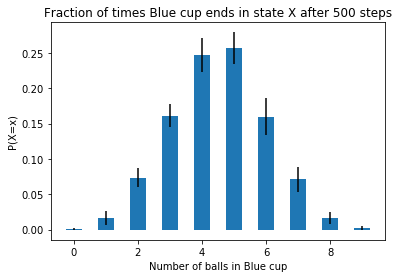

In [73]:
xvals=[0]*10
yvals=[0]*10
error=[0]*10
for j in range (10):
        m=[0]*10
        xvals[j]=j
        for i in range(10):
            m[i]=mean(j)

        m.sort()
        splmean1=sum(m)/10  
        UC1=m[math.floor(19/2)]-splmean1
        LC1=splmean1-m[math.floor(1/2)]
        error[j]=max(LC1,UC1)
        yvals[j]=splmean1

fig, ax= plt.subplots()
prob=ax.bar(xvals, yvals, 10*[0.5], yerr=error)
ax.set_title('Fraction of times Blue cup ends in state X after 500 steps')
ax.set_xlabel("Number of balls in Blue cup")
ax.set_ylabel("P(X=x)")
plt.show()

### Histogram of time spent in each state

In a similar way to what I have done above, I am here plotting a histogram. This time however I have written my code to track what state X is in after each individual step and not just where it ends up after 500 steps. Once again I used resampling to create error bars. The histogram that I produced plots the state X is in against the fraction of time that the chain spent in this state. 

In [62]:
def move(X):
    if np.random.uniform(0,1)<X/9: return X-1
    if np.random.uniform(0,1)<0.5: return X+1
    return X

def hist(nsteps):
    nsteps, state, histo = 10000,3, 10*[0]
    for i in range(nsteps):
        state = move(state)
        histo[state] = histo[state] + 1

    for i in range(10) : histo[i] = histo[i] / nsteps
    return histo

In [65]:
histo_samples = np.zeros([100,10])
for i in range(100) : histo_samples[i] = hist(1000)

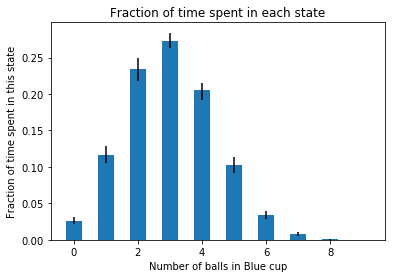

In [74]:
lower, upper, mean = 10*[0], 10*[0], 10*[0]
xvals = np.linspace( 0, 9, 10 )
for j in range(10):
    mean[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower[j] = mean[j] - sortedl[4]
    upper[j] = sortedl[94] - mean[j]
    
fig, ax= plt.subplots()
prob=ax.bar(xvals,mean,10*[0.5],yerr=[lower,upper])
plt.title('Fraction of time spent in each state')
plt.xlabel("Number of balls in Blue cup")
plt.ylabel("Fraction of time spent in this state")
plt.show()

### Is there a stationary distribution?

My final pieces of software allow me to find the stationary distribution of the Markov chain and furthermore investigate whether it has a limiting stationary distribution. In order to check this I need to use my transition matrix. I have written my transition matrix into an array that can easily be manipulated using linear algebra methods. As you can see the process of creating the transition matrix is much more simplified than that described in the theory section. This is because I noticed patterns of how the probabilities were related to the number of balls currently in the blue cup. 

In [11]:
X=[0]*10
X[0]=[0.5,0.5,0,0,0,0,0,0,0,0]
X[9]=[0,0,0,0,0,0,0,0,1,0]
for i in range(1,9):
    m=[0]*10
    m[i-1]=i/9
    m[i]=((9-i)/9)*0.5
    m[i+1]=((9-i)/9)*0.5
    X[i]=m


In [12]:
A=np.array(X)
print(A)

[[ 0.5         0.5         0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.11111111  0.44444444  0.44444444  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.22222222  0.38888889  0.38888889  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.33333333  0.33333333  0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.44444444  0.27777778  0.27777778
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.55555556  0.22222222
   0.22222222  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.66666667
   0.16666667  0.16666667  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.77777778  0.11111111  0.11111111  0.        ]
 [ 0.          0.          0.          0

The stationary distribution of a Markov chain is a probability distribution that remains unchanged as time progresses. The stationary distribution is a row vector that satisfies the following;$$\pi A = \pi$$ 
where $\pi$ is the stationary distribution.


We know that eigenvalues and eigenvectors satisfy the equation $$Av=\lambda v$$The stationary distribution, equal to the top left eigenvector of the transition matrix. Notice that these two equations are very similar, however, a stationary distribution requires the eigenvalue $\lambda $ to equal one and the eigenvalues are being taken on the left in the second equation, whereas they were on the right in the first equation. The eigenvector with an eigenvalue of 1 will, therefore, be top left eigenvector and this should be our stationary distribution. To get the top left and not the top right eigenvector we must first take the transpose of A and the extract its first eigenvector.

In [13]:
eigvals, eigvecs = np.linalg.eig( A.transpose() )

In [14]:
print( eigvecs[:,0] )

[ -5.85383655e-02  -2.63422645e-01  -5.26845289e-01  -6.14652837e-01
  -4.60989628e-01  -2.30494814e-01  -7.68316047e-02  -1.64639153e-02
  -2.05798941e-03  -1.14332745e-04]


It can be seen that the top left eigenvector, in this case, is not equal to the stationary distribution as all the elements are negative and the elements do not sum to one as shown below. Therefore this would not be a suitable probabilty distribution.

In [15]:
print( sum(eigvecs[:,0]) )

-2.25041142082


As stated previously the stationary distribution is the top left eigenvector and so although this does not have the properties that we need we are going to use it. The top left eigenvector needs to be normalised so that it sums to one. We do this by dividing each element of the eigenvector by the sum of the eigenvector. This process is carried out below.

In [16]:
inorm = sum(eigvecs[:,0] )
limdist = len(eigvecs[:,0])*[0]
for i in range( len(limdist) ) : limdist[i] = eigvecs[i,0] / inorm
print("The stationary distribution is", limdist, "as you can see this sums to ", sum(limdist))

The stationary distribution is [0.026012294873748953, 0.1170553269318706, 0.23411065386374086, 0.27312909617436409, 0.20484682213077235, 0.10242341106538584, 0.0341411370217952, 0.0073159579332418056, 0.00091449474165522363, 5.0805263425290078e-05] as you can see this sums to  1.0


We can check that our outcome is indeed our stationary distribution by comupting $\pi A = \pi$. 

In [17]:
np.matmul(limdist,A)

array([  2.60122949e-02,   1.17055327e-01,   2.34110654e-01,
         2.73129096e-01,   2.04846822e-01,   1.02423411e-01,
         3.41411370e-02,   7.31595793e-03,   9.14494742e-04,
         5.08052634e-05])

### Comparison

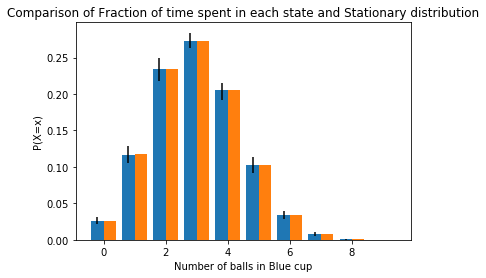

In [75]:
xvals1=[0]*10
xvals2=[0]*10
sdist=[0]*10
error=[0]*10
for j in range (10):
        m=[0]*100
        xvals1[j]=j-0.2
        xvals2[j]=j+0.2
lower, upper, mean = 10*[0], 10*[0], 10*[0]
xvals = np.linspace( 0, 9, 10 )
for j in range(10):
    mean[j] = sum( histo_samples[:,j]) / len( histo_samples[:,j] )
    sortedl = np.sort( histo_samples[:,j] )
    lower[j] = mean[j] - sortedl[4]
    upper[j] = sortedl[94] - mean[j] 
    
fig, ax= plt.subplots()
prob=ax.bar(xvals1, mean, 10*[0.4], yerr=[lower,upper] ,label='Sampling')
prob=ax.bar(xvals2, limdist, 10*[0.4], label='Stationary Distribution')
ax.set_title('Comparison of Fraction of time spent in each state and Stationary distribution')
ax.legend=()
ax.set_xlabel("Number of balls in Blue cup")
ax.set_ylabel("P(X=x)")
plt.show()